In [1]:
import pandas as pd
import numpy as np
import sklearn as SL
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')
df.head()

,EXP_1,EXP_2,IMP_1,IMP_2,RES_1,RES_2,FOOBE_1,FOOBE_3,FOOBE_4,FOOBE_9,...,INF_2,INF_3,INF_4,AGE,GEN,DIS,EDU,CWS,HHI,TR1
0,5,5,7,6,2,3,6,7,7,6,...,1,1,2,1,1,2,4,1,8,4
1,5,5,6,5,5,2,7,7,1,6,...,3,3,3,6,1,2,5,6,6,5
2,5,5,5,5,5,3,6,6,6,6,...,3,3,4,6,1,2,4,6,3,5
3,7,7,7,7,7,1,7,7,6,5,...,3,4,4,2,2,3,5,3,4,2
4,5,5,5,4,5,3,4,5,1,1,...,1,1,1,4,1,1,4,2,4,5


In [3]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a simple dataset
# Adjusted n_samples to 1050 and n_features to 32
X, y = make_classification(n_samples=1050, n_features=32, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
search_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    # Since all your variables are categorical, 'max_features' can be between 1 to n_features
    'max_features': Integer(1, 32)
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Perform Bayesian Optimization
opt = BayesSearchCV(
    rf,
    search_space,
    n_iter=30,
    random_state=42,
    n_jobs=-1,
    cv=5
)

# Fit the model to find the best hyperparameters
opt.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = opt.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
accuracy = best_rf.score(X_test, y_test)
print("Accuracy with best hyperparameters:", accuracy)

Best hyperparameters: OrderedDict([('max_depth', 6), ('max_features', 25), ('min_samples_leaf', 4), ('min_samples_split', 7), ('n_estimators', 110)])
Accuracy with best hyperparameters: 0.919047619047619


In [4]:
from sklearn.metrics import classification_report, accuracy_score

In [5]:
y_pred = best_rf.predict(X_test)

In [6]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9190


In [7]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       112
           1       0.96      0.87      0.91        98

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



In [8]:
unique_preds = np.unique(y_pred)
print(unique_preds)

[0 1]


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming your data is loaded into a dataframe named 'data'
data = pd.read_your_data_method_here()  # replace with your data loading method

X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

AttributeError: module 'pandas' has no attribute 'read_your_data_method_here'

C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.46      0.67      0.54        24
           2       0.50      0.10      0.17        20
           3       0.50      0.22      0.31        18
           4       0.00      0.00      0.00        11
           5       0.79      0.94      0.86       137

    accuracy                           0.72       210
   macro avg       0.45      0.39      0.38       210
weighted avg       0.66      0.72      0.67       210



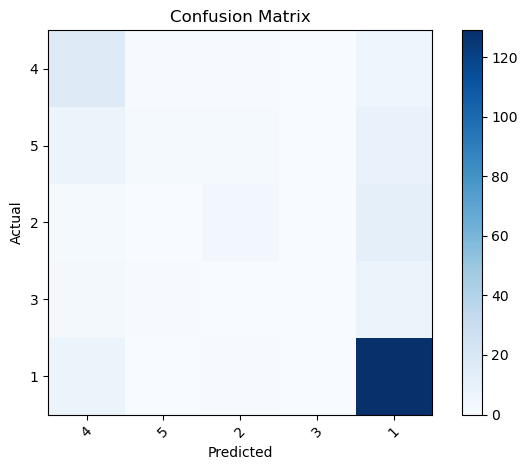

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Splitting the data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=110, max_depth=6, max_features=25, min_samples_leaf=4, min_samples_split=7, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plotting a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(df.iloc[:, -1].unique()))
plt.xticks(tick_marks, df.iloc[:, -1].unique(), rotation=45)
plt.yticks(tick_marks, df.iloc[:, -1].unique())
plt.tight_layout()
plt.show()

In [11]:
# Compute class weights
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[1, 2, 3, 4, 5], y=y_train)
weights = {1: class_weights[0], 2: class_weights[1], 3: class_weights[2], 4: class_weights[3], 5: class_weights[4]}

# Initialize the RandomForestClassifier with class weights
clf_weighted = RandomForestClassifier(n_estimators=110, max_depth=6, max_features=25, min_samples_leaf=4, min_samples_split=7, random_state=42, class_weight=weights)

# Fit the model
clf_weighted.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_weighted = clf_weighted.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           1       0.44      0.62      0.52        24
           2       0.44      0.20      0.28        20
           3       0.25      0.39      0.30        18
           4       0.09      0.09      0.09        11
           5       0.91      0.85      0.88       137

    accuracy                           0.69       210
   macro avg       0.43      0.43      0.41       210
weighted avg       0.72      0.69      0.69       210



In [12]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training RandomForest on resampled data
clf_resampled = RandomForestClassifier(n_estimators=110, max_depth=6, max_features=25, min_samples_leaf=4, min_samples_split=7, random_state=42)
clf_resampled.fit(X_resampled, y_resampled)

# Predicting on the test data
y_pred_resampled = clf_resampled.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           1       0.42      0.58      0.49        24
           2       0.14      0.10      0.12        20
           3       0.21      0.22      0.22        18
           4       0.06      0.09      0.07        11
           5       0.83      0.77      0.80       137

    accuracy                           0.60       210
   macro avg       0.33      0.35      0.34       210
weighted avg       0.63      0.60      0.61       210



In [13]:
import xgboost as xgb

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_predictions))

ModuleNotFoundError: No module named 'xgboost'

In [14]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.7 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.7 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.3/99.7 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.6/99.7 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.9/99.7 MB 3.0 MB/s eta 0:00:33
   ---------------------------------------- 1.2/99.7 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.7/99.7 MB 4.4 MB/s eta 0:00:23
    --------------------------------------- 2.1/99.7 MB 5.0 MB/s eta 0:00:20
   - ---------------------

In [1]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\monam\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    archspec-0.2.1             |     pyhd8ed1ab_1          40 KB  conda-forge
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    conda-23.9.0               |  py311h1ea47a8_2         1.2 MB  conda-forge
    imbalanced-learn-0.11.0    |     pyhd8ed1ab_0         138 KB  conda-forge
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    openssl-3.0.11             |       h2bbff1b_2         7.4 MB
    py-xgboost-1.7.3           |  py311haa95532_0         274 KB
    python_abi-3.11            |         


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda-catalogs==0.2.0=py311haa95532_0
  - defaults/win-64::astropy==5.1=py311h5bb9823_0
  - defaults/win-64::bokeh==3.2.1=py311h746a85d_0
  - defaults/win-64::bottleneck==1.3.5=py311h5bb9823_0
  - defaults/win-64::contourpy==1.0.5=py311h59b6b97_0
  - defaults/win-64::daal4py==2023.1.1=py311h30df693_0
  - defaults/win-64::dask==2023.6.0=py311haa95532_0
  - defaults/win-64::datasets==2.12.0=py311haa95532_0
  - defaults/win-64::datashader==0.15.2=py311haa95532_0
  - defaults/win-64::datashape==0.5.4=py311haa95532_1
  - defaults/win-64::gensim==4.3.0=py311heda8569_0
  - defaults/win-64::h5py==3.9.0=py311h4e0e482_0
  - defaults/win-64::holoviews==1.17.1=py311haa95532_0
  - defaults/win-64::hvplot==0.8.4=py311haa95532_0
  - defaults/win-64::imagecodecs==2023.1.23=py311he6ff3c7_0
  - defaults/win-64::imageio==2.26.0=py311haa95532_0
  - defaul

In [2]:
import xgboost as xgb

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_predictions))

NameError: name 'X_train' is not defined

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [4]:
# Adjust the class labels
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train_adj)

# When you make predictions, remember to adjust them back
# xgb_predictions = xgb_classifier.predict(X_test) + 1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Adjust the class labels for XGBoost
y_adj = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train_adj, y_test_adj = train_test_split(X, y_adj, test_size=0.3, random_state=42)

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train_adj)

# When you make predictions, remember to adjust them back
# xgb_predictions = xgb_classifier.predict(X_test) + 1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [7]:
import xgboost as xgb

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_predictions))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [8]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")

# Adjust the class labels for training
y_train_adj = y_train - 1
xgb_classifier.fit(X_train, y_train_adj)

# Predict 
xgb_predictions_adj = xgb_classifier.predict(X_test)

# Adjust predictions back to original class labels
xgb_predictions = xgb_predictions_adj + 1

# Evaluate
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           1       0.46      0.52      0.49        42
           2       0.26      0.19      0.22        27
           3       0.24      0.12      0.16        32
           4       0.33      0.12      0.18        16
           5       0.82      0.93      0.87       198

    accuracy                           0.69       315
   macro avg       0.42      0.38      0.39       315
weighted avg       0.64      0.69      0.66       315



In [9]:
import xgboost as xgb
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Define the XGBoost function to be optimized by Bayesian Optimization
def xgb_evaluate(max_depth, gamma, colsample_bytree, eta):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'eta': eta,
        'objective': 'multi:softprob',
        'num_class': 5,
        'eval_metric': 'mlogloss'
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    return -1.0 * cv_result['test-mlogloss-mean'].iloc[-1]

# Convert training data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train-1)

# Hyperparameter bounds
xgb_bo = BayesianOptimization(xgb_evaluate, {
    'max_depth': (3, 10),
    'gamma': (0, 1),
    'colsample_bytree': (0.3, 1),
    'eta': (0.1, 0.3)
})

# Maximize the accuracy
xgb_bo.maximize(init_points=5, n_iter=15)

# Extract the parameters of the best iteration
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# Train the model with the best parameters found by Bayesian Optimization
xgb_classifier = xgb.XGBClassifier(**params, objective='multi:softprob', num_class=5, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train-1)

# Predict 
xgb_predictions_adj = xgb_classifier.predict(X_test)

# Adjust predictions back to original class labels
xgb_predictions = xgb_predictions_adj + 1

# Evaluate
print(classification_report(y_test, xgb_predictions))

ModuleNotFoundError: No module named 'bayes_opt'

In [10]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import sklearn as SL
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')
df.head()

,EXP_1,EXP_2,IMP_1,IMP_2,RES_1,RES_2,FOOBE_1,FOOBE_3,FOOBE_4,FOOBE_9,...,INF_2,INF_3,INF_4,AGE,GEN,DIS,EDU,CWS,HHI,TR1
0,5,5,7,6,2,3,6,7,7,6,...,1,1,2,1,1,2,4,1,8,4
1,5,5,6,5,5,2,7,7,1,6,...,3,3,3,6,1,2,5,6,6,5
2,5,5,5,5,5,3,6,6,6,6,...,3,3,4,6,1,2,4,6,3,5
3,7,7,7,7,7,1,7,7,6,5,...,3,4,4,2,2,3,5,3,4,2
4,5,5,5,4,5,3,4,5,1,1,...,1,1,1,4,1,1,4,2,4,5


In [3]:
import xgboost as xgb
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Define the XGBoost function to be optimized by Bayesian Optimization
def xgb_evaluate(max_depth, gamma, colsample_bytree, eta):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'eta': eta,
        'objective': 'multi:softprob',
        'num_class': 5,
        'eval_metric': 'mlogloss'
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    return -1.0 * cv_result['test-mlogloss-mean'].iloc[-1]

# Convert training data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train-1)

# Hyperparameter bounds
xgb_bo = BayesianOptimization(xgb_evaluate, {
    'max_depth': (3, 10),
    'gamma': (0, 1),
    'colsample_bytree': (0.3, 1),
    'eta': (0.1, 0.3)
})

# Maximize the accuracy
xgb_bo.maximize(init_points=5, n_iter=15)

# Extract the parameters of the best iteration
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# Train the model with the best parameters found by Bayesian Optimization
xgb_classifier = xgb.XGBClassifier(**params, objective='multi:softprob', num_class=5, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train-1)

# Predict 
xgb_predictions_adj = xgb_classifier.predict(X_test)

# Adjust predictions back to original class labels
xgb_predictions = xgb_predictions_adj + 1

# Evaluate
print(classification_report(y_test, xgb_predictions))

NameError: name 'X_train' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
import xgboost as xgb
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Define the XGBoost function to be optimized by Bayesian Optimization
def xgb_evaluate(max_depth, gamma, colsample_bytree, eta):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'eta': eta,
        'objective': 'multi:softprob',
        'num_class': 5,
        'eval_metric': 'mlogloss'
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    return -1.0 * cv_result['test-mlogloss-mean'].iloc[-1]

# Convert training data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train-1)

# Hyperparameter bounds
xgb_bo = BayesianOptimization(xgb_evaluate, {
    'max_depth': (3, 10),
    'gamma': (0, 1),
    'colsample_bytree': (0.3, 1),
    'eta': (0.1, 0.3)
})

# Maximize the accuracy
xgb_bo.maximize(init_points=5, n_iter=15)

# Extract the parameters of the best iteration
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# Train the model with the best parameters found by Bayesian Optimization
xgb_classifier = xgb.XGBClassifier(**params, objective='multi:softprob', num_class=5, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train-1)

# Predict 
xgb_predictions_adj = xgb_classifier.predict(X_test)

# Adjust predictions back to original class labels
xgb_predictions = xgb_predictions_adj + 1

# Evaluate
print(classification_report(y_test, xgb_predictions))

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth |
-------------------------------------------------------------------------
| 1         | -0.8851   | 0.3491    | 0.2202    | 0.7392    | 3.526     |
| 2         | -0.9434   | 0.8339    | 0.1217    | 0.2908    | 5.728     |
| 3         | -1.031    | 0.6528    | 0.2621    | 0.06243   | 9.322     |
| 4         | -0.8958   | 0.6292    | 0.1619    | 0.6823    | 4.157     |
| 5         | -0.8992   | 0.9054    | 0.1386    | 0.7634    | 6.886     |
| 6         | -0.9068   | 1.0       | 0.1       | 0.0       | 3.0       |
| 7         | -0.8801   | 0.9676    | 0.2749    | 0.9903    | 3.107     |
| 8         | -0.8807   | 0.3       | 0.3       | 1.0       | 7.404     |
| 9         | -1.066    | 0.3       | 0.3       | 0.0       | 7.148     |
| 10        | -0.9179   | 1.0       | 0.3       | 0.4751    | 3.604     |
| 11        | -0.8863   | 1.0       | 0.1       | 1.0       | 7.722     |
| 12        | -0.8751   | 0.3       | 

In [6]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now, train the XGBoost classifier on the resampled dataset
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_resampled, y_resampled)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [7]:
# Adjust the labels
y_resampled_adjusted = y_resampled - 1

# Train the XGBoost classifier with adjusted labels
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_resampled, y_resampled_adjusted)

# When predicting or evaluating, if you need the original labels, simply add 1 to the predictions:
# predictions = xgb_classifier.predict(X_test) + 1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [8]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Adjust the labels
y_train_adjusted = y_train - 1

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_adjusted)

# Now, train the XGBoost classifier on the resampled dataset
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_resampled, y_resampled)

# When predicting or evaluating, if you need the original labels, simply add 1 to the predictions:
# predictions = xgb_classifier.predict(X_test) + 1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [9]:
import xgboost as xgb
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Define the XGBoost function to be optimized by Bayesian Optimization
def xgb_evaluate(max_depth, gamma, colsample_bytree, eta):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'eta': eta,
        'objective': 'multi:softprob',
        'num_class': 5,
        'eval_metric': 'mlogloss'
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    return -1.0 * cv_result['test-mlogloss-mean'].iloc[-1]

# Convert training data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train-1)

# Hyperparameter bounds
xgb_bo = BayesianOptimization(xgb_evaluate, {
    'max_depth': (3, 10),
    'gamma': (0, 1),
    'colsample_bytree': (0.3, 1),
    'eta': (0.1, 0.3)
})

# Maximize the accuracy
xgb_bo.maximize(init_points=5, n_iter=15)

# Extract the parameters of the best iteration
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

# Train the model with the best parameters found by Bayesian Optimization
xgb_classifier = xgb.XGBClassifier(**params, objective='multi:softprob', num_class=5, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train-1)

# Predict 
xgb_predictions_adj = xgb_classifier.predict(X_test)

# Adjust predictions back to original class labels
xgb_predictions = xgb_predictions_adj + 1

# Evaluate
print(classification_report(y_test, xgb_predictions))

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth |
-------------------------------------------------------------------------
| 1         | -0.8768   | 0.516     | 0.1611    | 0.9646    | 8.928     |
| 2         | -0.9344   | 0.3048    | 0.2034    | 0.3161    | 5.888     |
| 3         | -0.8715   | 0.6936    | 0.1125    | 0.9264    | 9.673     |
| 4         | -0.9202   | 0.3463    | 0.1912    | 0.2489    | 9.464     |
| 5         | -0.9962   | 0.5503    | 0.2256    | 0.08602   | 7.664     |
| 6         | -0.8566   | 1.0       | 0.1       | 1.0       | 3.0       |
| 7         | -1.078    | 0.5336    | 0.3       | 0.0       | 3.0       |
| 8         | -0.894    | 0.9714    | 0.3       | 0.9189    | 9.241     |
| 9         | -0.8827   | 0.465     | 0.1746    | 0.9819    | 8.903     |
| 10        | -0.8566   | 1.0       | 0.1       | 1.0       | 3.786     |
| 11        | -0.8617   | 1.0       | 0.1       | 1.0       | 4.698     |
| 12        | -0.8724   | 0.3       | 

In [10]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Adjust the labels
y_train_adjusted = y_train - 1

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_adjusted)

# Now, train the XGBoost classifier on the resampled dataset
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_resampled, y_resampled)

# When predicting or evaluating, if you need the original labels, simply add 1 to the predictions:
# predictions = xgb_classifier.predict(X_test) + 1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [11]:
import pandas as pd
import xgboost as xgb

# Load the data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_predictions))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Load the data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testt2.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode the target variable to have class labels starting from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Create and train the model
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_classifier.predict(X_test)
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49        42
           1       0.26      0.19      0.22        27
           2       0.24      0.12      0.16        32
           3       0.33      0.12      0.18        16
           4       0.82      0.93      0.87       198

    accuracy                           0.69       315
   macro avg       0.42      0.38      0.39       315
weighted avg       0.64      0.69      0.66       315



In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming you already have your dataset loaded and preprocessed
# X_train, X_test, y_train, y_test = ...

# Normalize your input features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier (feedforward neural network)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Specify the architecture (adjust as needed)
    activation='relu',            # Activation function for hidden layers
    solver='adam',                # Optimizer
    alpha=0.0001,                 # L2 penalty (regularization term)
    max_iter=100,                 # Maximum number of iterations
    random_state=42,              # Random seed for reproducibility
)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = mlp.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6095238095238096
              precision    recall  f1-score   support

           0       0.36      0.33      0.35        42
           1       0.09      0.04      0.05        27
           2       0.29      0.06      0.10        32
           3       0.00      0.00      0.00        16
           4       0.71      0.88      0.79       198

    accuracy                           0.61       315
   macro avg       0.29      0.26      0.26       315
weighted avg       0.53      0.61      0.56       315



C:\Users\monam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=1000,  # Increase the number of iterations
    random_state=42,
)

In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=1000,
    learning_rate_init=0.001,  # Adjust the learning rate
    random_state=42,
)

In [16]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=1000,
    early_stopping=True,  # Enable early stopping
    validation_fraction=0.1,  # Fraction of training data to use for validation
    n_iter_no_change=20,  # Number of iterations with no improvement on the validation set to wait
    random_state=42,
)

In [17]:
# Use the trained MLPClassifier to make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model's performance on the test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [18]:
# Initialize and fit the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Use the trained MLPClassifier to make predictions on the test data
y_pred = mlp.predict(X_test)

# Now, you can evaluate the model's performance as shown in the previous code snippet.

In [19]:
# Use the trained MLPClassifier to make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model's performance on the test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.5523809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.24      0.25        42
           1       0.09      0.07      0.08        27
           2       0.26      0.19      0.22        32
           3       0.00      0.00      0.00        16
           4       0.70      0.79      0.74       198

    accuracy                           0.55       315
   macro avg       0.26      0.26      0.26       315
weighted avg       0.51      0.55      0.53       315

Confusion Matrix:
 [[ 10   4   5   0  23]
 [  6   2   3   0  16]
 [  6   3   6   1  16]
 [  2   1   2   0  11]
 [ 15  12   7   8 156]]


In [ ]:
''